<a href="https://colab.research.google.com/github/111Vidya/Python_fundamentals/blob/main/Mar_22_Named_Entity_Recognition_Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Named Entity Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)

<ipython-input-2-2c610e5521a0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("apple.txt",error_bad_lines=False)
Skipping line 6: expected 1 fields, saw 14



In [ ]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')



In [ ]:
#Misclassification of warranty as person
one_block = book[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
#Different sentence book 5. misclassified Mac as person
one_block = book[5]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

'I am very upset about the product as I checked my MacBook 15 days back in December, it didn’t start. It was luckily in warranty . I took it to the service centre and they informed me the mother board and battery collapsed. If it was not in warranty I had to pay 47000/. I asked for replacement of the product and I was refused. They got it fixed for me. I don’t know why should I pay 57000/ for Mac quality. If this is the quality and the service, then I have to go to other product. In January my product expiry was due. They have give an extension of 3 months warranty when I had asked for 1 year. Very disappointed.'

In [ ]:
#Identify POS
for token in doc_block[0:20]:
    print(token, token.pos_)

I PRON
am AUX
very ADV
upset ADJ
about ADP
the DET
product NOUN
as SCONJ
I PRON
checked VERB
my PRON
MacBook PROPN
15 NUM
days NOUN
back ADV
in ADP
December PROPN
, PUNCT
it PRON
did AUX


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['took', 'service', 'centre', 'informed', 'mother', 'board', 'battery', 'collapsed', 'warranty', 'had', 'pay', 'asked', 'replacement', 'product', 'refused', 'got', 'fixed', 'know', 'pay', 'quality']


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,product,4
1,warranty,3
2,service,2
3,pay,2
4,asked,2
5,quality,2
6,checked,1
7,days,1
8,start,1
9,took,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

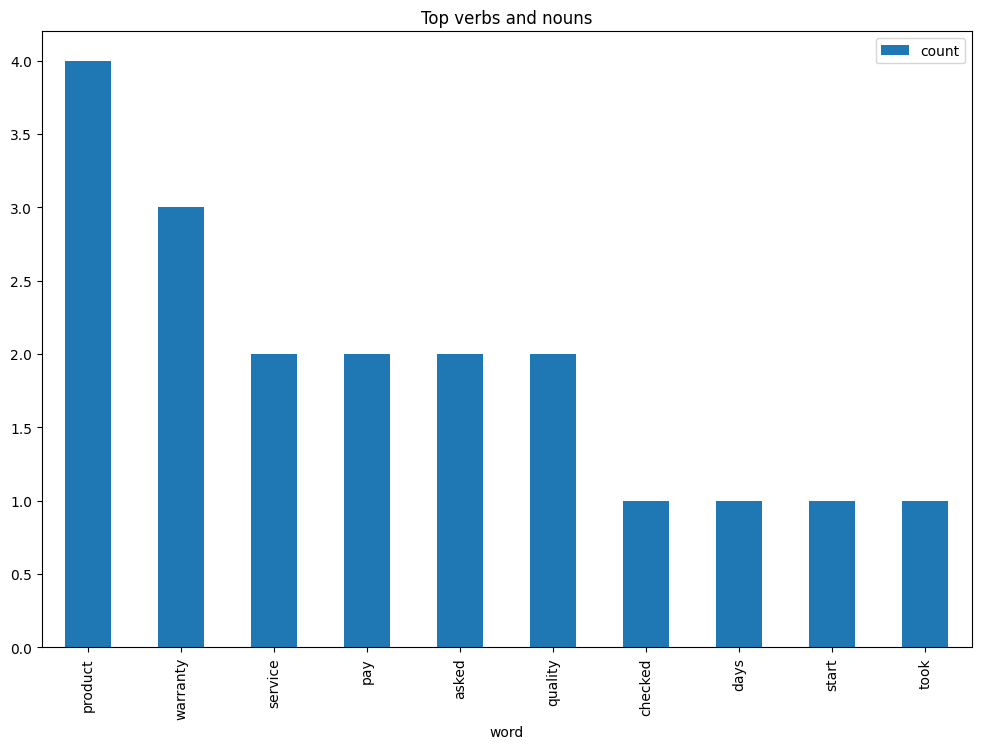

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

<ipython-input-16-06caa2f961e0>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("apple.txt",error_bad_lines=False)
Skipping line 6: expected 1 fields, saw 14



In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Ove

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
183,You can get one of the best movie experiences ...
184,Overall I would it a 4.5/5.
185,"I got a great deal on this laptop, which I hav..."
186,I got it not only on discount but also was abl...


In [ ]:
#convert text file of affin to a dictionary. Dictionary format will be Key value pair.Key=word value=assigned
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm') # loading language model
sentiment_lexicon = affinity_scores # store the dictionary in a variable called Sentiment_lexicon

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text) # recognise the language
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) # Get the score for each word
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [ ]:
calculate_sentiment(text = 'abhor')

-3

In [ ]:
calculate_sentiment(text = 'rejoice')

4

In [ ]:
# Create new col sentiment_value
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     1
6     7
7    47
8    16
9    29
Name: word_count, dtype: int64

In [ ]:
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
183,You can get one of the best movie experiences ...,3,12
184,Overall I would it a 4.5/5.,0,6
185,"I got a great deal on this laptop, which I hav...",3,18
186,I got it not only on discount but also was abl...,0,18


In [ ]:
#Sort the sentences based on senti values
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
111,"The build is super strong, the operating syste...",5,10
46,Now my mac is perfectly fine : Got the Apple M...,5,27
47,Ships with macOS sierra but update is availabl...,6,86
65,I hope this comment can help to save somebody’...,6,10
104,The switch was inspired by the awesome reviews...,6,13
60,I use this for music production and it works a...,7,30
179,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,7,43
0,It's amazing..... battery last around 10 -12 h...,7,17
152,..So now I m working with the external keyboar...,17,113
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [ ]:
# Sentiment score of the whole review. avg .93 very close to 1 and so there are +ve an -ve sentiments
sent_df['sentiment_value'].describe()

count    188.000000
mean       0.930851
std        3.379793
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review. most negetive sentiment 4th obs with -11
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,!,0,1
6,"), all printers are not compatible (e.g.",0,7
8,you need to spend extra for an external CD wri...,0,16


In [ ]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
87,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [ ]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-35-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

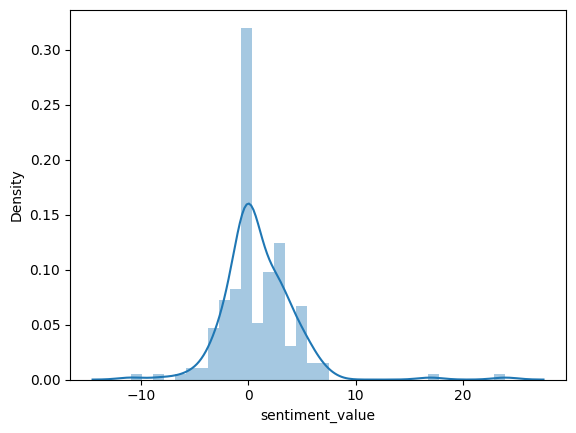

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

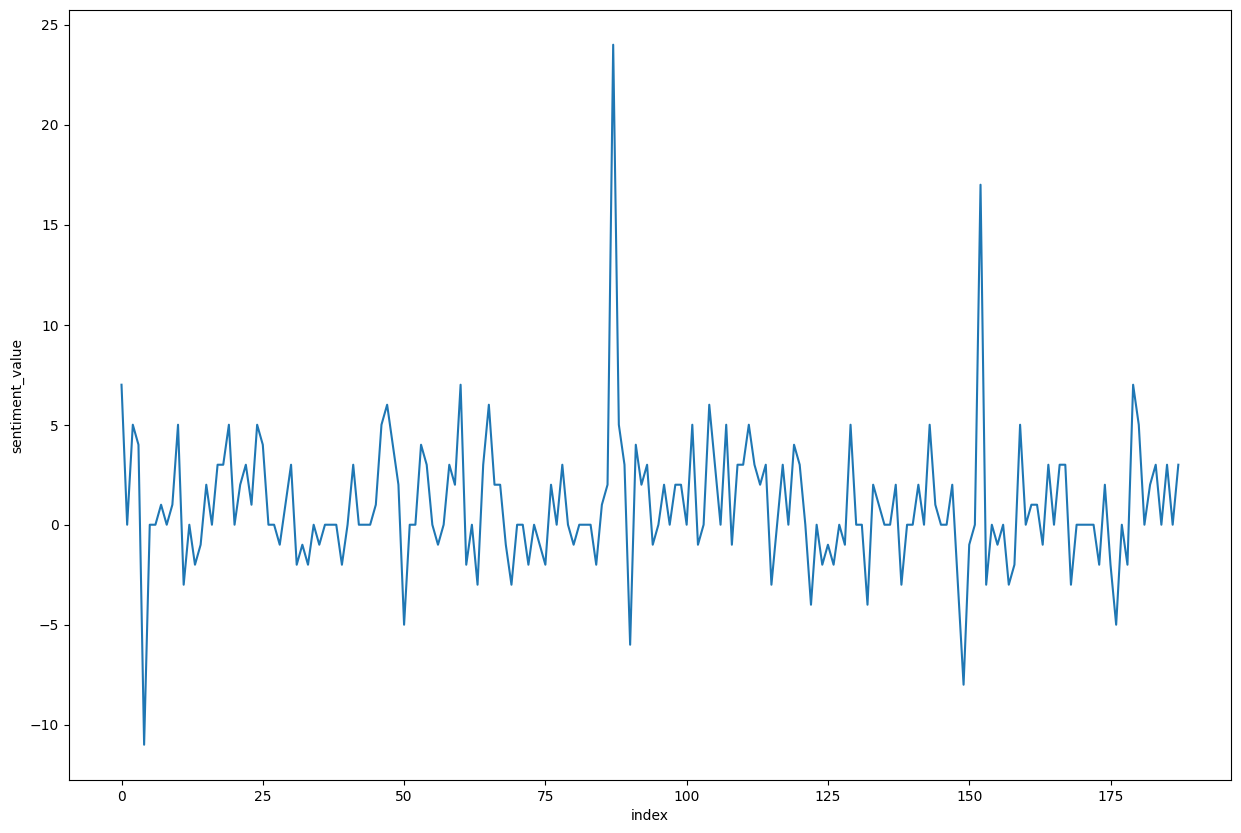

In [ ]:
# we can find the most -ve sentence and most +ve sentences from thos plot
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

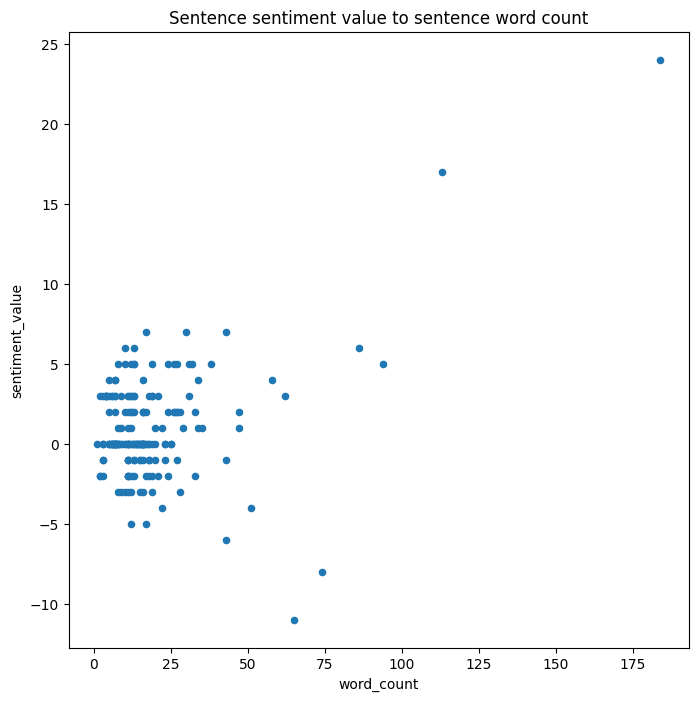

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')